# Импорт библиотек

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st


np.random.seed(123)

# Нормальное распределение

Нормальное распределение - унимодальное (имеющее одну моду) и симметричное распределение, в котором отклонение от средних подчиняется определенному закону:
* 68.2% наблюдений расположены в диапазоне +-1сигма
* 95.4% наблюдений находятся в диапазоне +-2 сигмы и тд

In [2]:
mu = 0
sigma = 1
norms = np.random.normal(loc=mu, scale=sigma, size=10000)

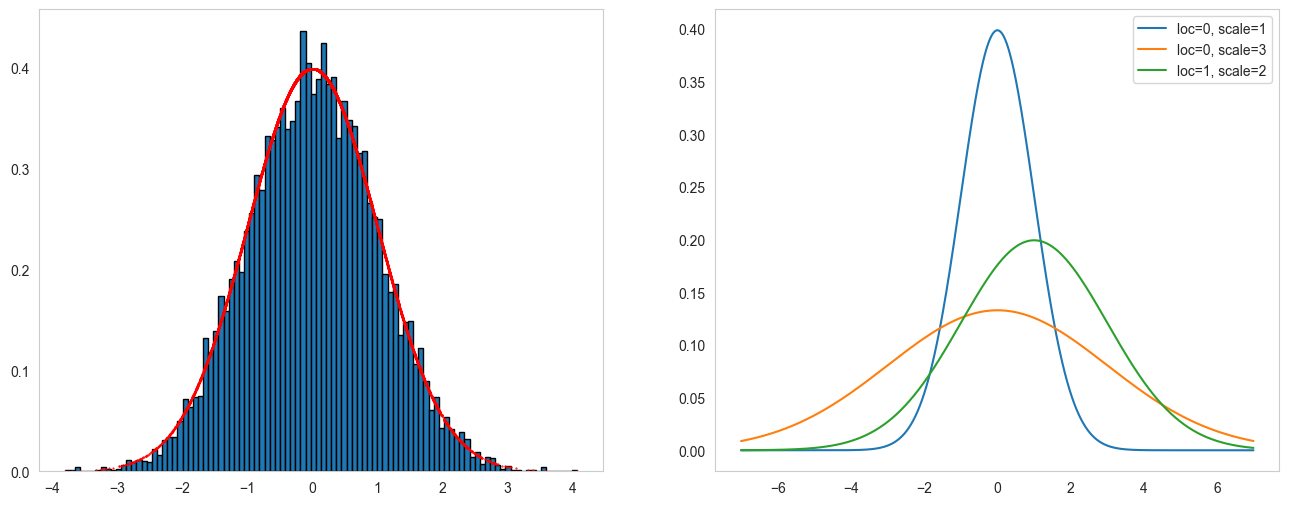

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.hist(norms, bins=100, density=True, ec='k');
ax1.grid(False)
ax1.plot(norms, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (norms - mu)**2 / (2 * sigma**2) ), '.r', markersize=1);

x = np.arange(-7, 7, 0.01)
ax2.plot(x, st.norm.pdf(x, loc=0, scale=1), label='loc=0, scale=1');
ax2.plot(x, st.norm.pdf(x, loc=0, scale=3), label='loc=0, scale=3');
ax2.plot(x, st.norm.pdf(x, loc=1, scale=2), label='loc=1, scale=2');
ax2.legend();
ax2.grid(False)

# Z-стандартизация

По умолчанию любое распределение, как правило, смещено относительно нуля и имеет стандартное отклонение, отличное от 1. Но для исследований бывает полезно отмасштабировать данные так, чтобы среднее и станартное отклонение стали равны 0 и 1 соответственно. Такое преобразование называется z-стандартизацией. Оно выполняется по следующей формуле

$$ \large z _i = \frac{x _i - \mu}{\sigma}   $$

Для распределения нужно рассчитать среднее и стандартное отклонение, а затем из каждого числа вычесть среднее и поделить эту разницу на стандартное отклонение

In [18]:
dist = np.random.uniform(-2, 15, 1000)
mu = np.mean(dist)
sigma = np.std(dist)

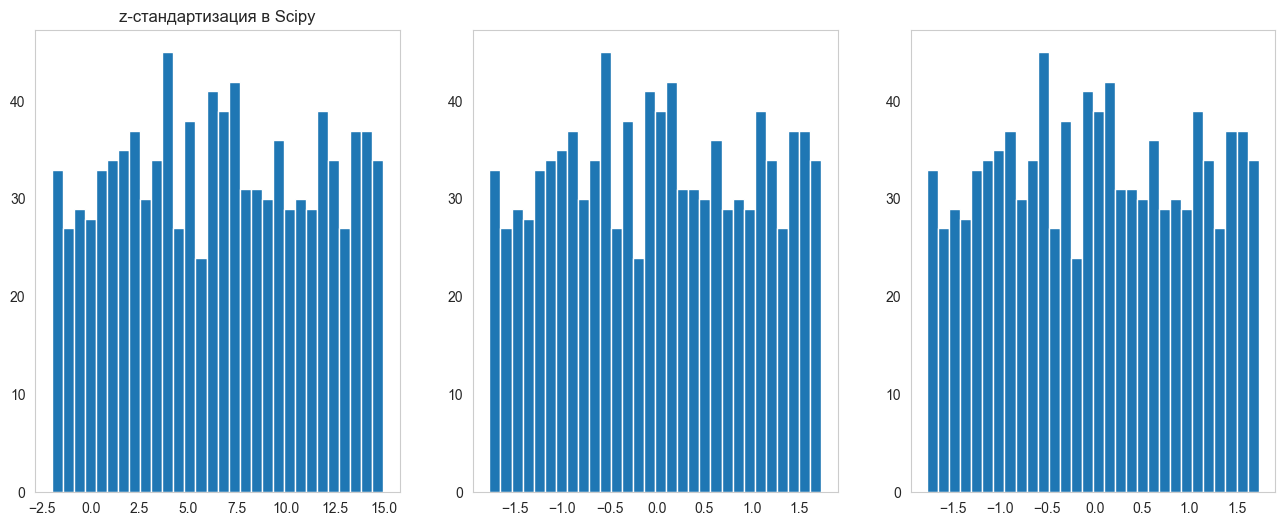

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

ax1.set_title('Исходное распределение')
ax1.hist(dist, bins=30);
ax1.grid(False)

ax2.set_title('Ручная z-стандартизация')
ax2.hist([(item-mu)/sigma for item in dist], bins=30)
ax2.grid(False);

ax3.set_title('z-стандартизация в Scipy')
ax3.hist(st.zscore(dist), bins=30)
ax3.grid(False);

**Вывод**

Стандартное отклонение не меняет форму распределения, но приводит срднее к нулю и стандартное отклонение к единице

Прикладной смысл z-стандартизации применительно к нормально распределенным величинам такой: зная параметры распределения, мы можем оценить, какой процент наблюдений не превышает определенную величину.

Пример:
Пусть дано распределение (и известно, что оно **нормальное**) роста людей heights. Нужно оценить вероятность встретить человека с ростом более 190 см

In [211]:
q = 195
mu = 170
sigma = 15
heights = np.random.normal(loc=mu, scale=sigma, size=1000)
height_prob = st.norm.pdf(sorted(heights), loc=np.mean(heights), scale=np.std(heights))

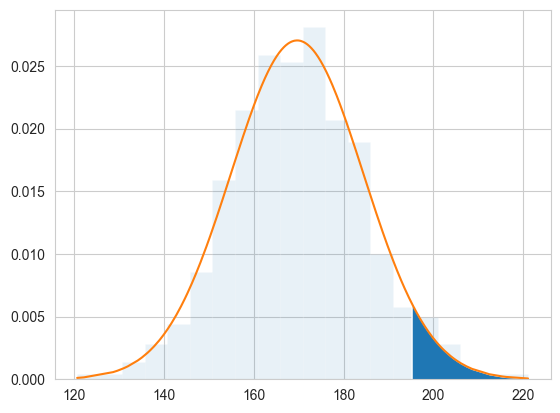

In [212]:
fig, ax1 = plt.subplots(1, 1)
ax1.hist(heights, bins=20, density=True, ec='w', alpha=0.1);
ax1.plot(sorted(heights), height_prob);
ax2 = plt.fill_between(np.sort(heights), 0, height_prob, where=np.sort(heights)>q)

Переведем искомую границу в z-шкалу и найдем площадь закрашенного участка под кривой

In [213]:
print(f'Рост {q} отклоняется от среднего на {(q-mu) / sigma:.2f} стандартных отклонений')
print(f'Вероятность встретить человека выше {q} см составляет {1-st.norm.cdf((q-mu) / sigma):.2%}')

Рост 195 отклоняется от среднего на 1.67 стандартных отклонений
Вероятность встретить человека выше 195 см составляет 4.78%


Аналогично можно решать задачи определения двусторонней вероятности (выше 195 см, но ниже 150) или наоборот (от 150 до 195)